In [2]:
S="""
RL

AAA = (BBB, CCC)
BBB = (DDD, EEE)
CCC = (ZZZ, GGG)
DDD = (DDD, DDD)
EEE = (EEE, EEE)
GGG = (GGG, GGG)
ZZZ = (ZZZ, ZZZ)
""".strip()

lines=S.split("\n")
instructions=lines[0]
print(instructions)

RL


In [3]:
D={}
for line in lines[2:]:

    key=line.split("=")[0].strip()
    L=line.split("(")[1].split(",")[0].strip()
    R=line.split("(")[1].split(",")[1].split(")")[0].strip()

    D[key]={'L':L,'R':R}

In [4]:
D

{'AAA': {'L': 'BBB', 'R': 'CCC'},
 'BBB': {'L': 'DDD', 'R': 'EEE'},
 'CCC': {'L': 'ZZZ', 'R': 'GGG'},
 'DDD': {'L': 'DDD', 'R': 'DDD'},
 'EEE': {'L': 'EEE', 'R': 'EEE'},
 'GGG': {'L': 'GGG', 'R': 'GGG'},
 'ZZZ': {'L': 'ZZZ', 'R': 'ZZZ'}}

In [5]:
key='AAA'
count=0
while key!='ZZZ':
    inst=instructions[count % len(instructions)]
    print(key," ",inst,"-->",D[key][inst])
    key=D[key][inst]
    count+=1
    if count>20:
        break
print(count)

AAA   R --> CCC
CCC   L --> ZZZ
2


In [6]:
S="""
LLR

AAA = (BBB, BBB)
BBB = (AAA, ZZZ)
ZZZ = (ZZZ, ZZZ)
""".strip()
lines=S.split("\n")
instructions=lines[0]
print(instructions)

LLR


In [7]:
D={}
for line in lines[2:]:

    key=line.split("=")[0].strip()
    L=line.split("(")[1].split(",")[0].strip()
    R=line.split("(")[1].split(",")[1].split(")")[0].strip()

    D[key]={'L':L,'R':R}

In [8]:
key='AAA'
count=0
while key!='ZZZ':
    inst=instructions[count % len(instructions)]
    print(key," ",inst,"-->",D[key][inst])
    key=D[key][inst]
    count+=1
    if count>20:
        break

print(count)

AAA   L --> BBB
BBB   L --> AAA
AAA   R --> BBB
BBB   L --> AAA
AAA   L --> BBB
BBB   R --> ZZZ
6


In [24]:
S=open('data/day8.txt').read().strip()
lines=S.split("\n")
instructions=lines[0]
print(instructions)

LLRLRRLLRLRRLLRLRRLRRRLRLRLRRRLLRLRRRLRLRRRLRLRLLLRRLRLRLLRLRRLRRRLRRRLLRRLRLRRRLRRLRRRLRLLRRLRRRLRRRLRRLRLRRLLLRLRLLRRRLRRLLRLRLRRLLRLRRLLRLRRLRRLLRRRLRLRLRRRLLRRRLRRLRRRLRRRLRLRRRLRRLLLRRRLRLLLRRRLRLLRLLRRRLLRRLRRRLRRRLRLLRLRLRRRLLRRLRRRLRRLRLLRRRLRRLRRRLRRRLRRRLRLRRRLRRRLRLRRRR


In [25]:
D={}
for line in lines[2:]:

    key=line.split("=")[0].strip()
    L=line.split("(")[1].split(",")[0].strip()
    R=line.split("(")[1].split(",")[1].split(")")[0].strip()

    D[key]={'L':L,'R':R}

In [26]:
key='AAA'
count=0
while key!='ZZZ':
    inst=instructions[count % len(instructions)]
    key=D[key][inst]
    count+=1

print(count)

18827


In [27]:
keys=list(D.keys())
keys=[key for key in keys if key.endswith('A')]
len(keys)

6

In [28]:
all([key.endswith('A') for key in keys])

True

In [29]:
import sys

In [30]:
count=0
while True:
    inst=instructions[count % len(instructions)]
    keys=[D[key][inst] for key in keys]
    count+=1

    if all([key.endswith('Z') for key in keys]):
        break

    if count%1000000 ==0:
        print(".",end="")
        sys.stdout.flush()
print(count)

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 

In [31]:
%matplotlib inline
from pylab import *

In [40]:
keys=list(D.keys())
keys=[key for key in keys if key.endswith('A')]

count=0
data={}
for i,key in enumerate(keys):
        data[i]=[]
    
while True:
    inst=instructions[count % len(instructions)]
    keys=[D[key][inst] for key in keys]
    count+=1

    if all([key.endswith('Z') for key in keys]):
        break

    for i,key in enumerate(keys):
        if key.endswith('Z'):
            data[i].append(count)

    if count>100000:
        break

print(count)

100001


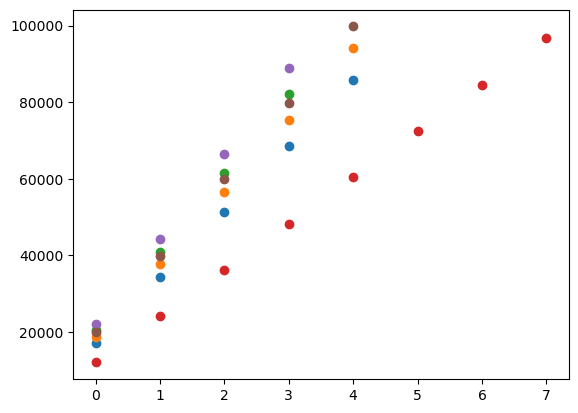

In [43]:
for key in data:
    plot(data[key],'o')

In [50]:
for key in data:
    data[key]=array(data[key])
    print(data[key]/data[key][0])
    

[1. 2. 3. 4. 5.]
[1. 2. 3. 4. 5.]
[1. 2. 3. 4.]
[1. 2. 3. 4. 5. 6. 7. 8.]
[1. 2. 3. 4.]
[1. 2. 3. 4. 5.]


In [48]:
data[1]/data[1][0]

array([1., 2., 3., 4., 5.])

In [51]:
import math

In [54]:
math.lcm(*[data[key][0] for key in data])

20220305520997